### [Metrics/Scoring](https://scikit-learn.org/stable/modules/model_evaluation.html)

- Three Scikit APIs of note:
    - **estimator `score` methods**: provides a default evaluation method.
    - **scoring parameter**: used by Cross Validation tools.
    - **metric functions**: used to compute prediction error in specific situations.
    
- [dummy estimators](https://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators) provide baseline metric values for random predictions.

- [pairwise metrics](https://scikit-learn.org/stable/modules/metrics.html#metrics) provide metrics *between samples*. They are not estimators or predictors.

###  [Accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)

- returns the fraction (default) or count (`normalize=False`) of correct predictions. Returns subset accuracy for multilabel classification. 1.0 & 0.0 equal perfect and worse-case scores respectively.

In [10]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]

print(accuracy_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred, normalize=False))

0.5
2


### [Top K Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.top_k_accuracy_score.html#sklearn.metrics.top_k_accuracy_score)

- A prediction is correct as long as the *true label* matches one $k$ highest predicted scores. `accuracy_score` is a a special case of `k=1`.

- Covers binary & multiclass classification problems (but not multilabel).

In [11]:
import numpy as np
from sklearn.metrics import top_k_accuracy_score

y_true = np.array(  [0,   1,   2,   2])
y_score = np.array([[0.5, 0.2, 0.2],
                    [0.3, 0.4, 0.2],
                    [0.2, 0.4, 0.3],
                    [0.7, 0.2, 0.1]])

# Not normalizing gives the number of "correctly" classified samples

print(top_k_accuracy_score(y_true, y_score, k=2))
print(top_k_accuracy_score(y_true, y_score, k=2, normalize=False))

0.75
3


### [Balanced Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score)

- Avoids inflated performance estimates on *imbalanced datasets*.

In [12]:
from sklearn.metrics import balanced_accuracy_score
y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1]
print(balanced_accuracy_score(y_true, y_pred))

0.625


### [Cohen's kappa](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html#sklearn.metrics.cohen_kappa_score)

- Designed to compare labelings by different human annotators - not a classifier versus a ground truth.

- The kappa score is a number between [-1..+1]. Scores above .8 are generally considered good agreement; zero or lower means no agreement (practically random labels).

- Applicable for binary or multiclass problems - not for multilabel problems (except by manually computing a per-label score) and not for more than two annotators.

In [13]:
from sklearn.metrics import cohen_kappa_score
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
cohen_kappa_score(y_true, y_pred)

0.4285714285714286

### [Confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

- Each entry ($i$,$j$) is the number of observations actually in group $i$, but *predicted* to be in group $j$.
- `normalize` reports ratios instead of counts, using sums of each column, each row or the entire matrix.

In [19]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
print(confusion_matrix(y_true, y_pred))
print(confusion_matrix(y_true, y_pred, normalize='all'))

[[2 0 0]
 [0 0 1]
 [1 0 2]]
[[0.33333333 0.         0.        ]
 [0.         0.         0.16666667]
 [0.16666667 0.         0.33333333]]


- To get counts of *true negatives*, *false positives*, *false negatives* and *true positives* in binary problems:

In [20]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(tn, fp, fn, tp)

2 1 2 3


- [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) does the same, but visually.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

CM
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
CM, Normalized
[[1.    0.    0.   ]
 [0.    0.625 0.375]
 [0.    0.    1.   ]]


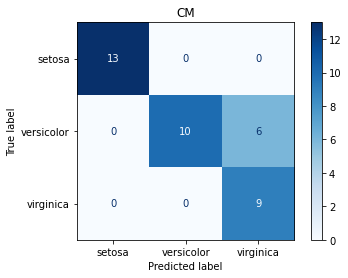

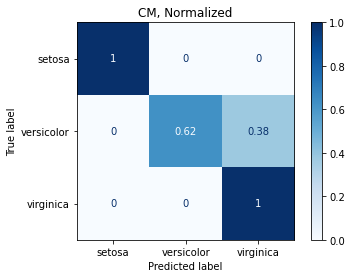

In [17]:
iris = datasets.load_iris()
X,y,names = iris.data, iris.target, iris.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

classifier = svm.SVC(kernel='linear', 
                     C=0.01).fit(X_train, y_train)

titles_options = [("CM", None),
                  ("CM, Normalized", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

### [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)

- Builds a text report of the main classification metrics.

In [21]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 0]
y_pred = [0, 0, 2, 1, 0]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(
    y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.50      0.67         2

    accuracy                           0.60         5
   macro avg       0.56      0.50      0.49         5
weighted avg       0.67      0.60      0.59         5



### [Hamming Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html#sklearn.metrics.hamming_loss)

- Returns the average Hamming loss or [Hamming distance](https://en.wikipedia.org/wiki/Hamming_distance) between two sets of samples.

In [22]:
from sklearn.metrics import hamming_loss
y_pred = [1, 2, 3, 4]
y_true = [2, 2, 3, 4]
print(hamming_loss(y_true, y_pred))

# multilabel case - binary label indicators
print(hamming_loss(np.array([[0, 1], [1, 1]]), 
                   np.zeros((2, 2))))

0.25
0.75


### [Precision](https://en.wikipedia.org/wiki/Precision_and_recall#Precision), [Recall](https://en.wikipedia.org/wiki/Precision_and_recall#Recall) & [F-measure](https://en.wikipedia.org/wiki/F1_score)

- `precision`: the ability to avoid labeling a negative sample as positive: $\text{precision} = \frac{tp}{tp + fp}$

- `recall`: the ability to find all positive samples: $\text{recall} = \frac{tp}{tp + fn}$

- `f-measure`: the weighted harmonic mean of precision & recall: $F_\beta = (1 + \beta^2) \frac{\text{precision} \times \text{recall}}{\beta^2 \text{precision} + \text{recall}}$

### [Precision Recall Curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve)

- Returns a *precision-recall* curve using the ground truth label and the classifier's score by *varying a decision threshold*.

- Only applicable to binary problems.

### [Average Precision Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score)

- Returns average precision from the predictions scores. Answer can range between [0..1]; higher is better.

- Only applicable to binary classification & multilabel indicator formats.

### Binary vs Multiclass vs Multilabel Classification

- Binary classification outcomes:
    - **TP** (true positive) = correct result
    - **FP** (false positive) = unexpected result
    - **FN** (false negative) = missing result
    - **TN** (true negative) = correct absence of result


- Multiclass/Multilabel classification: precision, recall & F-measure stats can be independently applied to each label. Several metrics include ways to combine results across labels. using the `average` param.


In [23]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split as TTS
import numpy as np

iris = datasets.load_iris()
X,y = iris.data, iris.target
random_state          = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 
                                200 * n_features)]

X_train, X_test, y_train, y_test = TTS(X[y<2], 
                                       y[y<2],
                                       test_size=.5,
                                       random_state=random_state)

classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

In [25]:
from sklearn.metrics import average_precision_score as APS
avg_prec = APS(y_test, y_score)

print('avg precision-recall score: {0:0.2f}'.format(avg_prec))

avg precision-recall score: 0.88


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.88')

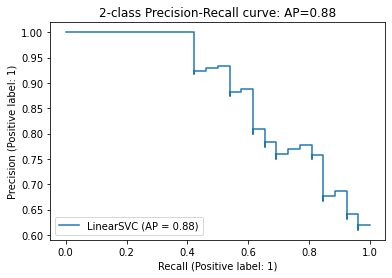

In [26]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(avg_prec))

### Precision-Recall Curve, Multilabel

In [27]:
from sklearn.preprocessing import label_binarize

# Use label_binarize to be multi-label like settings
Y = label_binarize(y, classes=[0, 1, 2])
n_classes = Y.shape[1]

# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5,
                                                    random_state=random_state)

# use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier as OVRC

# Run classifier
classifier = OVRC(svm.LinearSVC(random_state=random_state))
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)

In [28]:
from sklearn.metrics import precision_recall_curve as PRC
from sklearn.metrics import average_precision_score as APS

precision, recall, avg_prec = dict(), dict(), dict()

for i in range(n_classes):
    precision[i], recall[i], _ = PRC(Y_test[:, i],
                                     y_score[:, i])
    avg_prec[i] = APS(Y_test[:, i], 
                      y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = PRC(Y_test.ravel(),
                                             y_score.ravel())
avg_prec["micro"] = APS(Y_test,
                        y_score,
                        average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(avg_prec["micro"]))


Average precision score, micro-averaged over all classes: 0.43


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.43')

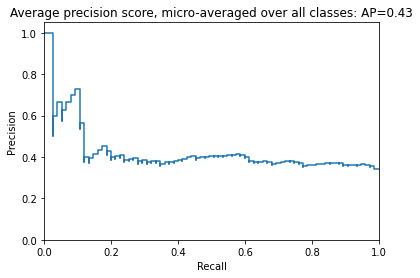

In [29]:
plt.step(recall['micro'], precision['micro'], where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(avg_prec["micro"]))

### [Jaccard Similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html#sklearn.metrics.jaccard_score)

- Returns an average of the [Jaccard similarity coefficient](https://en.wikipedia.org/wiki/Jaccard_index) between pairs of label sets.

- The Jaccard coefficient of an $i$th sample with ground truth label $y_i$ and predicted label $\hat{y}_i$ is $J(y_i, \hat{y}_i) = \frac{|y_i \cap \hat{y}_i|}{|y_i \cup \hat{y}_i|}$.

In [30]:
import numpy as np
from sklearn.metrics import jaccard_score

y_true = np.array([[0, 1, 1], [1, 1, 0]])
y_pred = np.array([[1, 1, 1], [1, 0, 0]])

# binary
print(jaccard_score(y_true[0], y_pred[0]))

# binary label indicators
print(jaccard_score(y_true, y_pred, average='samples'))
print(jaccard_score(y_true, y_pred, average='macro'))
print(jaccard_score(y_true, y_pred, average=None))

# multiclass - binarized, treated as multilabel
y_pred = [0, 2, 1, 2]; y_true = [0, 1, 2, 2]

print(jaccard_score(y_true, y_pred, average=None))
print(jaccard_score(y_true, y_pred, average='macro'))
print(jaccard_score(y_true, y_pred, average='micro'))

0.6666666666666666
0.5833333333333333
0.6666666666666666
[0.5 0.5 1. ]
[1.         0.         0.33333333]
0.4444444444444444
0.3333333333333333


### [Hinge Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html#sklearn.metrics.hinge_loss)

- [wikipedia](https://en.wikipedia.org/wiki/Hinge_loss): A distance metric that only considers prediction errors. Used in max margin classifiers such as SVMs.

In [31]:
from sklearn import svm
from sklearn.metrics import hinge_loss
X,y = [[0], [1]], [-1, 1]
est = svm.LinearSVC(random_state=0).fit(X, y)

pred_decision = est.decision_function([[-2], [3], [0.5]])
print("decision:\t",pred_decision)

print(hinge_loss([-1, 1, 1], pred_decision))

decision:	 [-2.18177944  2.36355888  0.09088972]
0.3030367603854425


In [32]:
# hinge loss - multiclass SVM classifier
X      = np.array([[0], [1], [2], [3]])
Y      = np.array([0, 1, 2, 3])
labels = np.array([0, 1, 2, 3])
est    = svm.LinearSVC().fit(X, Y)

pred_decision = est.decision_function([[-1], [2], [3]])
y_true = [0, 2, 3]
print(hinge_loss(y_true, pred_decision, labels))

0.5641072414567065


/home/bjpcjp/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[0 1 2 3] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


### [Log Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss)

- Also called *logistic regression loss* or *cross-entropy loss*.

- Commonly used in multinomial logistic regression, neural nets, and some expectation-maximization problems.

- Binary classification: log loss per sample = the negative log-likelihood of the classifier given a true label: $L_{\log}(y, p) = -\log \operatorname{Pr}(y|p) = -(y\log(p)+(1-y)\log(1-p))$

- Multiclass classification: using samples coded in a 1-of-K binary indicator matrix: log loss of entire set: $L_{\log}(Y, P) = -\log \operatorname{Pr}(Y|P) = - \frac{1}{N} \sum_{i=0}^{N-1} \sum_{k=0}^{K-1} y_{i,k} \log p_{i,k}$

In [33]:
from sklearn.metrics import log_loss
y_true = [0, 0, 1, 1]

# 1st [.9,.1] pair = 90% probability of 1st sample has label = 0.
y_pred = [[.9, .1], [.8, .2], [.3, .7], [.01, .99]]

log_loss(y_true, y_pred)

0.1738073366910675

### [Matthews Correlation Coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html#sklearn.metrics.matthews_corrcoef)

- [Wikipedia](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient)

- Given TP = #true positives, FP = #false positives, TN = #true negatives, FN = #false negatives:

    - binary: $MCC = \frac{tp \times tn-fp \times fn}{\sqrt{(tp+fp)(tp+fn)(tn+fp)(tn+fn)}}.$

In [34]:
from sklearn.metrics import matthews_corrcoef
y_true = [+1, +1, +1, -1]
y_pred = [+1, -1, +1, +1]
matthews_corrcoef(y_true, y_pred)

-0.3333333333333333

### [Confusion Matrix (Multilabel)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html#sklearn.metrics.multilabel_confusion_matrix)

- Returns a class-wise (default) or sample-wise (`samplewise=True`) confusion matrix to evaluation classifier accuracy.

In [35]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
y_true = np.array([[1, 0, 1],
                   [0, 1, 0]])
y_pred = np.array([[1, 0, 0],
                   [0, 1, 1]])
multilabel_confusion_matrix(y_true, y_pred)

array([[[1, 0],
        [0, 1]],

       [[1, 0],
        [0, 1]],

       [[0, 1],
        [1, 0]]])

In [36]:
# sample-wise:
multilabel_confusion_matrix(y_true, y_pred, samplewise=True)

array([[[1, 0],
        [1, 1]],

       [[1, 1],
        [0, 1]]])

In [37]:
# multiclass inputs:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
multilabel_confusion_matrix(y_true, y_pred,
                            labels=["ant", "bird", "cat"])

array([[[3, 1],
        [0, 2]],

       [[5, 0],
        [1, 0]],

       [[2, 1],
        [1, 2]]])

### [Receiver Operating Characteristic (ROC)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve)

- Plots True Positive Rate (TPR) vs False Positive Rate (FPR) for binary classifiers.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split as TTS
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier as OVRC
#from scipy import interp
from numpy import interp
from sklearn.metrics import roc_auc_score

In [45]:
iris = datasets.load_iris()
X,y = iris.data, iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noise
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

X_train, X_test, y_train, y_test = TTS(X,y,test_size=.5,random_state=0)

classifier = OVRC(svm.SVC(kernel='linear', 
                          probability=True,
                          random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr,tpr,roc_auc = dict(),dict(),dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

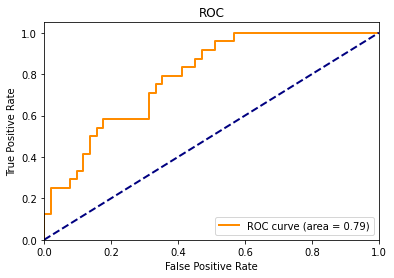

In [46]:
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

### ROC Curves (Multilabel)

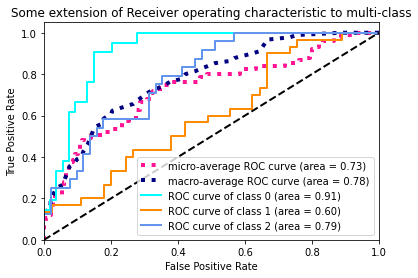

In [47]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")

### [Example: Area Under ROC, Multiclass](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

- [ROC_AUC_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) can be used for multiclass classification.

- Multiclass OvO compares every unique class pair. Below: calculate AUC using OvR & OvO schemes, report macro average, report prevalence-weighted average.

In [49]:
y_prob = classifier.predict_proba(X_test)

# macro roc_auc, OvO:
MRAO = roc_auc_score(y_test, y_prob, 
                     multi_class="ovo", average="macro")
# weighted, roc_auc, OvO:
WRAO = roc_auc_score(y_test, y_prob, 
                     multi_class="ovo", average="weighted")
# macro, roc_auc, OvR:
MRAR = roc_auc_score(y_test, y_prob, 
                     multi_class="ovr", average="macro")
# weighted, roc_auc, OvR:
WRAR = roc_auc_score(y_test, y_prob, 
                     multi_class="ovr", average="weighted")

print("OvO ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(MRAO, WRAO))
print("OvR ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(MRAR, WRAR))

OvO ROC AUC scores:
0.698586 (macro),
0.665839 (weighted by prevalence)
OvR ROC AUC scores:
0.698586 (macro),
0.665839 (weighted by prevalence)


### [Detection Error Tradeoff (DET)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.det_curve.html#sklearn.metrics.det_curve)

- Plots error rates for binary classifiers - false reject rates vs false acceptance rates. The axes are are scaled non-linearly, which provides curves that are more linear than ROC curves.

In [51]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_det_curve
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

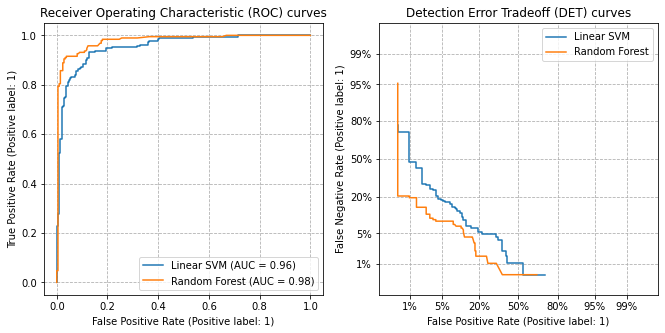

In [52]:
N_SAMPLES = 1000

classifiers = {
    "Linear SVM": make_pipeline(StandardScaler(), 
                                LinearSVC(C=0.025)),
    "Random Forest": RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1
    ),
}

X, y = make_classification(
    n_samples=N_SAMPLES, n_features=2, n_redundant=0, n_informative=2,
    random_state=1, n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.4, random_state=0)

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    plot_roc_curve(clf, X_test, y_test, ax=ax_roc, name=name)
    plot_det_curve(clf, X_test, y_test, ax=ax_det, name=name)
    
ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')
ax_det.set_title('Detection Error Tradeoff (DET) curves')

ax_roc.grid(linestyle='--')
ax_det.grid(linestyle='--')

plt.legend()

### [Zero One Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html#sklearn.metrics.zero_one_loss)

- Find the sum or average of the *0-1 classification loss* (the percentage of imperfectly predicted subsets). The function normalizes the answer by default. Use `normalize=False` to get the sums instead.

- In multilabel classification: it scores a subset as if one of its labels strictly match the predictions - and as a zero if any errors.


In [53]:
from sklearn.metrics import zero_one_loss
y_pred = [1, 2, 3, 4]
y_true = [2, 2, 3, 4]

print(zero_one_loss(y_true, y_pred))
print(zero_one_loss(y_true, y_pred, normalize=False))

# multilabel, with binary label indicators:
print(zero_one_loss(np.array([[0, 1], [1, 1]]), 
                    np.ones((2, 2))))
print(zero_one_loss(np.array([[0, 1], [1, 1]]), 
                    np.ones((2, 2)),  normalize=False))

0.25
1
0.5
1


### [Brier Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html#sklearn.metrics.brier_score_loss)

- Returns a [Brier Score](https://en.wikipedia.org/wiki/Brier_score) for binary classes. Values are [0..1]. The smaller the value, the more accurate the prediction.

- Defined as the MSE of actual outcome and predicted probability estimate p=Pr(y=1): $BS = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}} - 1}(y_i - p_i)^2$

In [54]:
import numpy as np
from sklearn.metrics import brier_score_loss
y_true = np.array([0, 1, 1, 0])
y_true_categorical = np.array(["spam", "ham", "ham", "spam"])
y_prob = np.array([0.1, 0.9, 0.8, 0.4])
y_pred = np.array([0, 1, 1, 0])

print(brier_score_loss(y_true, y_prob))
print(brier_score_loss(y_true, 1 - y_prob, pos_label=0))
print(brier_score_loss(y_true_categorical, y_prob, pos_label="ham"))
print(brier_score_loss(y_true, y_prob > 0.5))

0.055
0.055
0.055
0.0


###